In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker


# Load data
data = pd.read_csv("C:/Users/akash/Documents/Coding Projects/CleanEnergyFundingF24/data/new/ZIP/njzip.csv")
sns.set_context('talk')
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelsize': 16,
    'axes.labelweight': 'regular',
    'legend.fontsize': 12,
    'legend.title_fontsize': 16,  # Adjust legend title size
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

def format_num(num, pos, fmt=1e6):
    """Format numbers for x-axis and y-axis."""
    if num == 0:
        return '0'
    elif num < fmt / 100:
        return f'{num:.1f}'
    else:
        return f'{num / fmt:.1f}M'

# Data preprocessing
data = data.iloc[:, 1:]
data['date'] = pd.to_datetime(data['date']).dt.to_period('M')
data['year'] = data['date'].dt.year.astype(str)
data['month'] = data['date'].dt.month.astype(str)
data['class'] = data['class'].astype(str)

data['ratio'] = data['awarded'] / data['cost']
data['vehicleCost'] = data['cost'] / data['numberOfVehicles']
data['vehiclesAwarded'] = data['awarded'] / data['numberOfVehicles']

# Group by class
class_summary = data.groupby('class').agg(
    total_vehicles=('numberOfVehicles', 'sum'),
    total_awarded=('awarded', 'sum'),
    total_cost=('cost', 'sum'),
    avg_cost_per_vehicle=('vehicleCost', 'mean'),
    avg_award_per_vehicle=('vehiclesAwarded', 'mean'),
    avg_award_to_cost_ratio=('ratio', 'mean')
).reset_index()

# Group by year
yearly_summary = data.groupby('year').agg(
    count=('numberOfVehicles', 'count'),
    total_vehicles=('numberOfVehicles', 'sum'),
    total_awarded=('awarded', 'sum'),
    total_cost=('cost', 'sum'),
    avg_cost_per_vehicle=('vehicleCost', 'mean'),
    avg_award_per_vehicle=('vehiclesAwarded', 'mean'),
    avg_award_to_cost_ratio=('ratio', 'mean')
).reset_index()

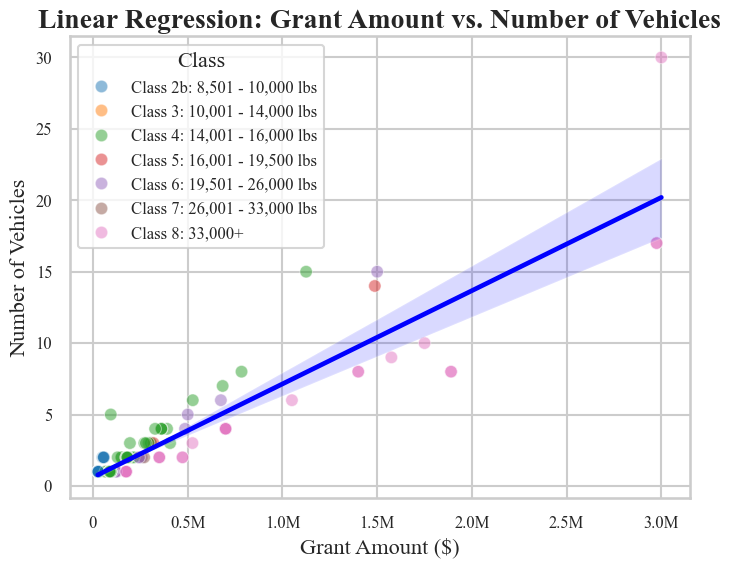

In [10]:

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='awarded', y='numberOfVehicles', hue='class', hue_order=sorted(data['class'].unique()), alpha=0.5)
sns.regplot(data=data, x='awarded', y='numberOfVehicles', scatter=False, color='blue', ci=80)
plt.title("Linear Regression: Grant Amount vs. Number of Vehicles")
plt.xlabel("Grant Amount ($)")
plt.ylabel("Number of Vehicles")
plt.legend(title='Class')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_num))
plt.savefig("graphs/scatter_plot.png")
plt.show()

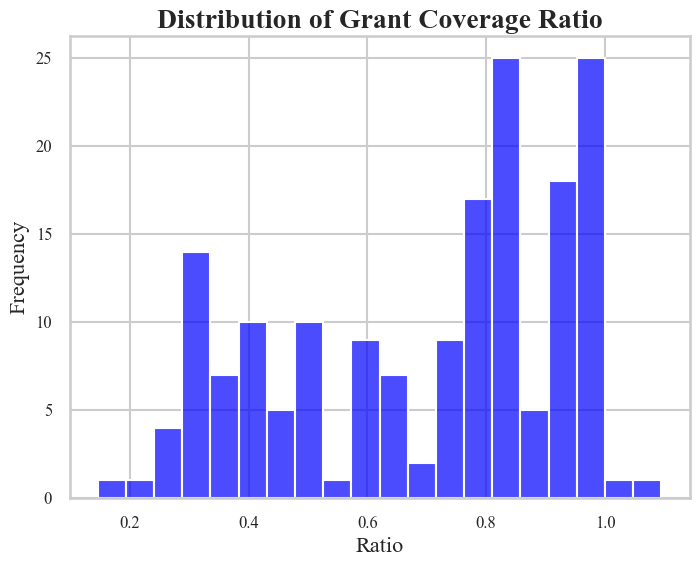

In [11]:


# Histogram of ratio
plt.figure(figsize=(8, 6))
sns.histplot(data['ratio'], bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Grant Coverage Ratio")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.savefig("graphs/distribution.png")
plt.show()


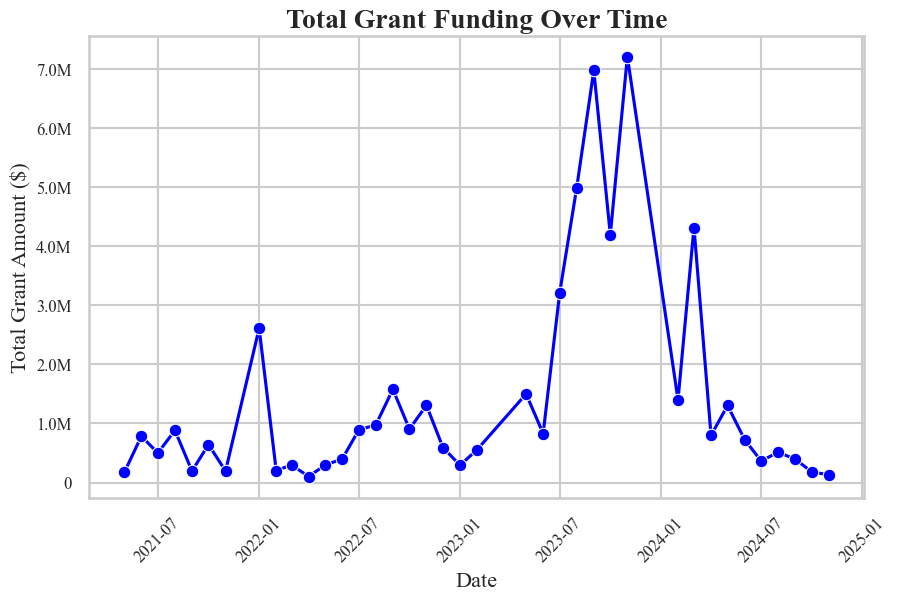

In [12]:


# Line plots for total grant funding over time
monthly_funding = data.groupby(['year', 'month']).agg(total_awarded=('awarded', 'sum')).reset_index()
monthly_funding['date'] = monthly_funding.apply(lambda row: datetime.strptime(f"{row['year']}-{row['month']}-01", "%Y-%m-%d"), axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_funding, x='date', y='total_awarded', marker='o', color='blue')
plt.title("Total Grant Funding Over Time")
plt.xlabel("Date")
plt.ylabel("Total Grant Amount ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_num))
plt.show()

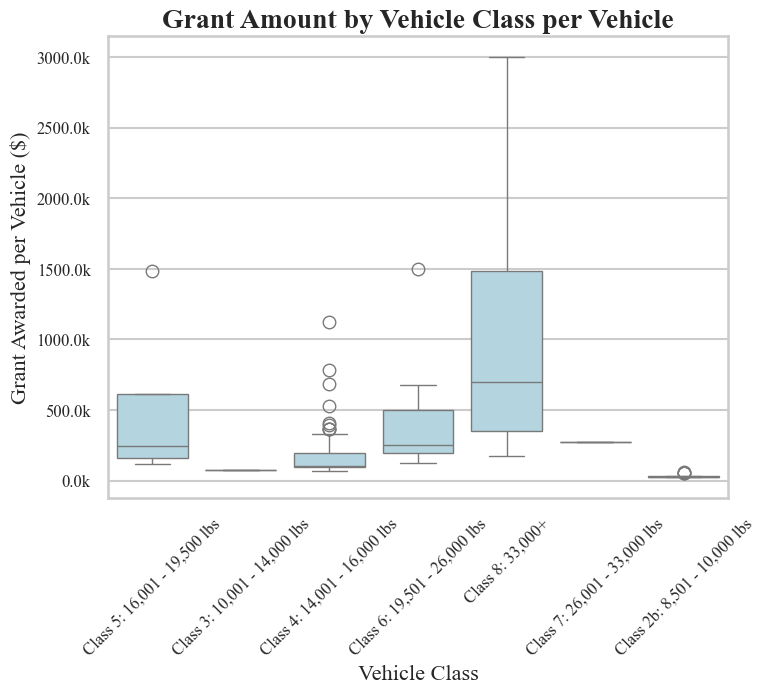

In [13]:


# Boxplot for grant amount by vehicle class
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='class', y='awarded', color='lightblue')
plt.title("Grant Amount by Vehicle Class per Vehicle")
plt.xlabel("Vehicle Class")
plt.ylabel("Grant Awarded per Vehicle ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e3:.1f}k'))

plt.savefig("graphs/per_vehicle.png")
plt.show()

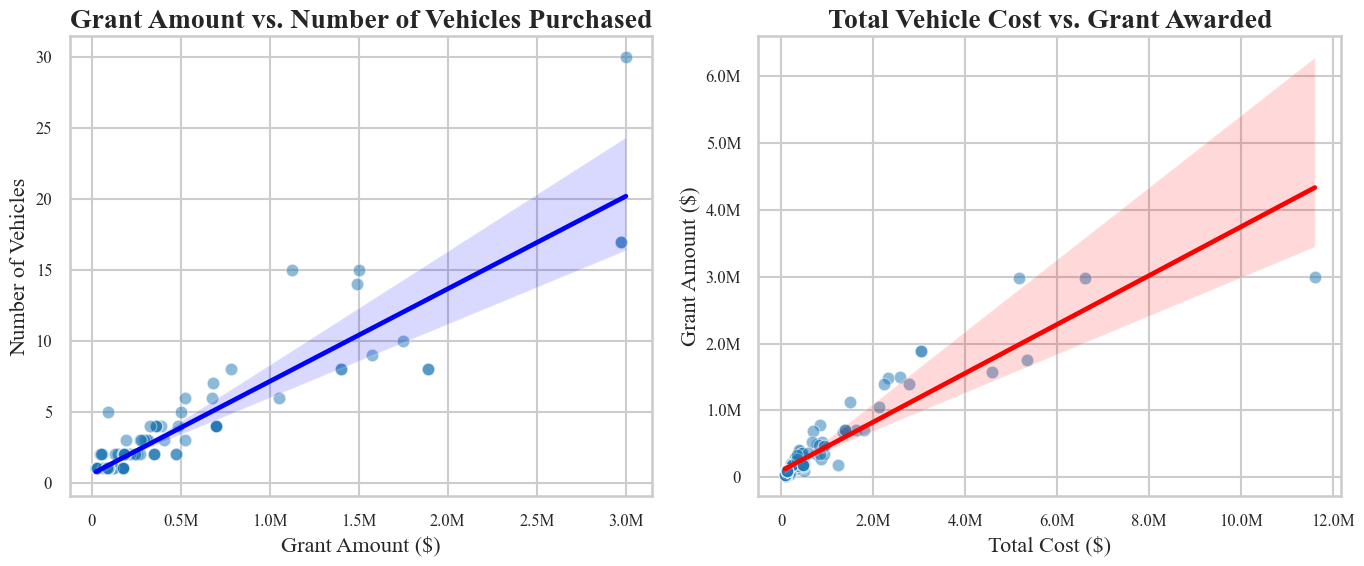

In [14]:



# Scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(ax=axes[0], data=data, x='awarded', y='numberOfVehicles', alpha=0.5)
sns.regplot(ax=axes[0], data=data, x='awarded', y='numberOfVehicles', scatter=False, color='blue')
axes[0].set_title("Grant Amount vs. Number of Vehicles Purchased")
axes[0].set_xlabel("Grant Amount ($)")
axes[0].set_ylabel("Number of Vehicles")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_num))

sns.scatterplot(ax=axes[1], data=data, x='cost', y='awarded', alpha=0.5)
sns.regplot(ax=axes[1], data=data, x='cost', y='awarded', scatter=False, color='red')
axes[1].set_title("Total Vehicle Cost vs. Grant Awarded")
axes[1].set_xlabel("Total Cost ($)")
axes[1].set_ylabel("Grant Amount ($)")
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(format_num))
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_num))

plt.tight_layout()
plt.savefig("graphs/both.png")
plt.show()
